In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
m = 3
num_points = 100

In [3]:
x = np.random.randint(10, 60, num_points) #random points between 10 and 60
(m * x)[:5]

array([ 96,  63,  72, 159, 111])

In [4]:
x = np.linspace(10, 60, num_points) #equally spaced points bet =ween 10 and 60
(m * x)[:5]

array([30.        , 31.51515152, 33.03030303, 34.54545455, 36.06060606])

In [5]:
r = np.random.rand(num_points) # generates num_points random floats between 0 and 1.
r[:5]

array([0.50202785, 0.10953834, 0.53864931, 0.06568607, 0.27800534])

In [6]:
r = np.random.randn(num_points) # generates num_points random points from the std.normal distribution.
r[:5]

array([ 0.9874633 ,  0.20378339,  0.03087591, -0.72825344,  0.30639477])

In [7]:
print((m * x).shape, r.shape)

(100,) (100,)


In [8]:
y = m * x + r
y[:5]

array([30.9874633 , 31.71893491, 33.06117894, 33.8172011 , 36.36700083])

In [9]:
def plot_line(x, y):
    plt.figure(figsize=(20,10))
    plt.scatter(x, y, marker='*')
    plt.xlabel('$x_1$', size=30)
    plt.ylabel('y', size=30)
    plt.grid(True)
    plt.show()

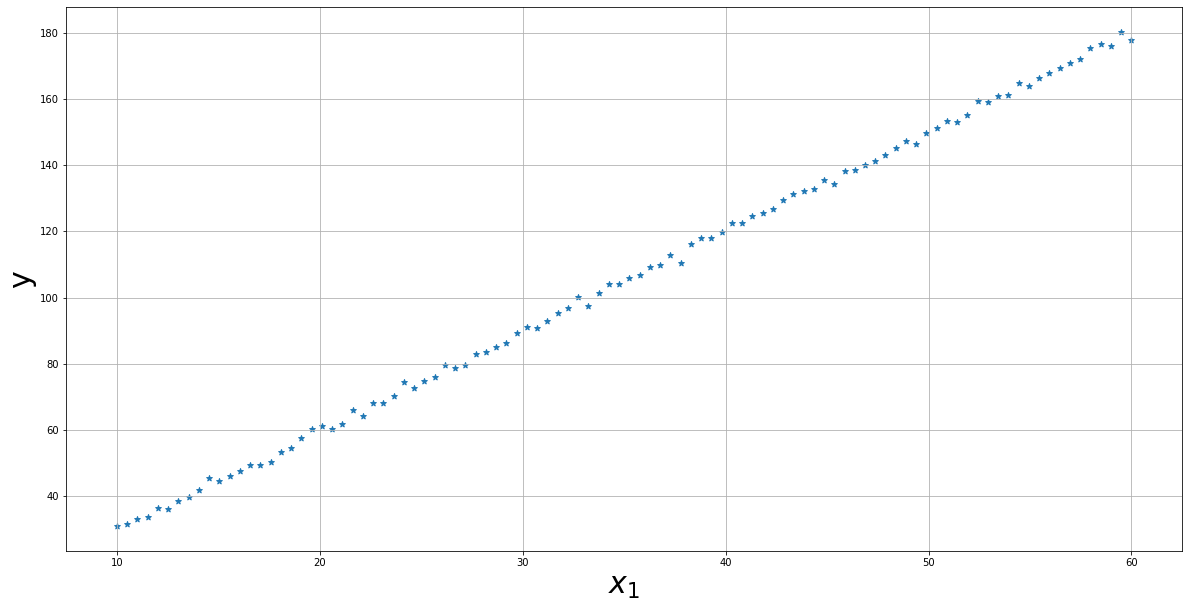

In [10]:
plot_line(x, y)

In [11]:
w0, w1 = np.random.rand(2,)
w0, w1

(0.7647656164986942, 0.3304377378575717)

In [12]:
y = w0 * x + w1
y

array([ 7.9780939 ,  8.36433916,  8.75058442,  9.13682969,  9.52307495,
        9.90932021, 10.29556547, 10.68181073, 11.06805599, 11.45430125,
       11.84054651, 12.22679177, 12.61303703, 12.99928229, 13.38552755,
       13.77177282, 14.15801808, 14.54426334, 14.9305086 , 15.31675386,
       15.70299912, 16.08924438, 16.47548964, 16.8617349 , 17.24798016,
       17.63422542, 18.02047069, 18.40671595, 18.79296121, 19.17920647,
       19.56545173, 19.95169699, 20.33794225, 20.72418751, 21.11043277,
       21.49667803, 21.88292329, 22.26916855, 22.65541382, 23.04165908,
       23.42790434, 23.8141496 , 24.20039486, 24.58664012, 24.97288538,
       25.35913064, 25.7453759 , 26.13162116, 26.51786642, 26.90411168,
       27.29035695, 27.67660221, 28.06284747, 28.44909273, 28.83533799,
       29.22158325, 29.60782851, 29.99407377, 30.38031903, 30.76656429,
       31.15280955, 31.53905482, 31.92530008, 32.31154534, 32.6977906 ,
       33.08403586, 33.47028112, 33.85652638, 34.24277164, 34.62

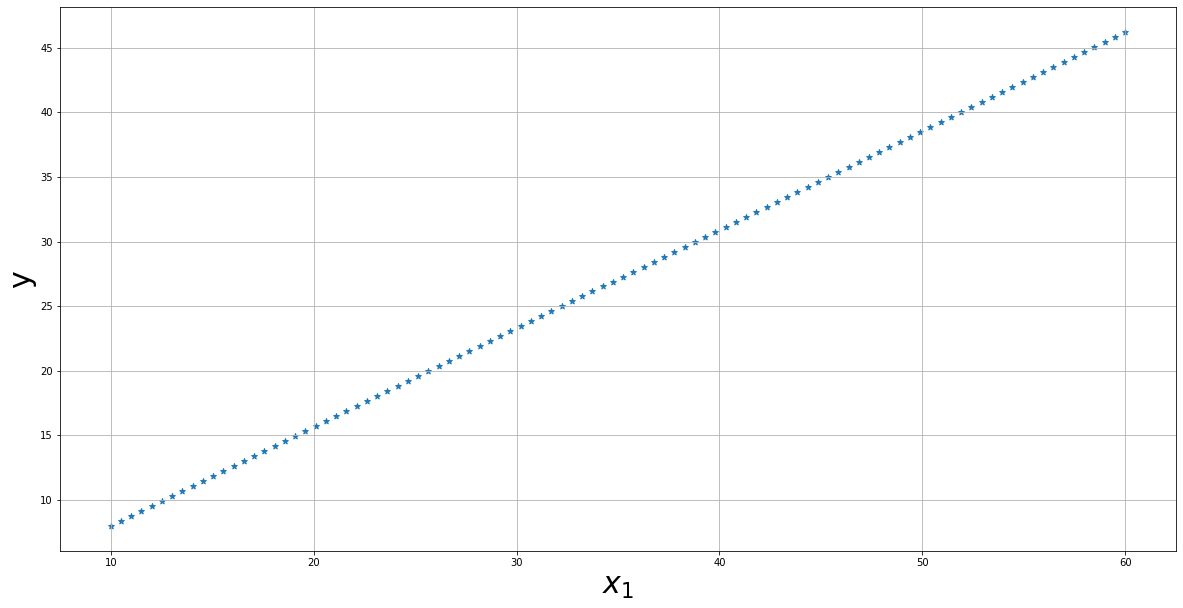

In [13]:
plot_line(x, y)

In [14]:
def loss(x, y, w):
    return 0.5 * (x @ w - y) @ (x @ w - y).T

In [15]:
x = np.random.randint(10, 60, num_points) #random points between 10 and 60
w = np.array([w0, w1])
y = w1 * x + w0

print(x.shape, w.shape)  

# x and w are not compatible for multiplication now.
# so add another column to the left of existing column of x, to make it compatible.
x = np.column_stack((np.ones(x.shape[0]), x))

print(x.shape, w.shape)

#if you generate y from the x and weight vector, as we've done, there will not be any loss
print(loss(x, y, w))

(100,) (2,)
(100, 2) (2,)
0.0


In [16]:
#However, if y was different, then there'll be loss
y = np.random.randint(10, 60, num_points) #random points between 10 and 60

print(loss(x, y, w))

38576.37223303817


In [17]:
# to calculate rmse
e = loss(x, y, w)
rmse = np.sqrt(2 * e / x.shape[0])
print(rmse)

27.776382857758197


In [18]:
# How to find pseudo-inverse of an array
def inverse(a):
    return np.linalg.pinv(a)

a = np.array(np.arange(100)).reshape(10,10)
inverse(a)

array([[-2.07272727e-02, -1.73333333e-02, -1.39393939e-02,
        -1.05454545e-02, -7.15151515e-03, -3.75757576e-03,
        -3.63636364e-04,  3.03030303e-03,  6.42424242e-03,
         9.81818182e-03],
       [-1.62424242e-02, -1.35757576e-02, -1.09090909e-02,
        -8.24242424e-03, -5.57575758e-03, -2.90909091e-03,
        -2.42424242e-04,  2.42424242e-03,  5.09090909e-03,
         7.75757576e-03],
       [-1.17575758e-02, -9.81818182e-03, -7.87878788e-03,
        -5.93939394e-03, -4.00000000e-03, -2.06060606e-03,
        -1.21212121e-04,  1.81818182e-03,  3.75757576e-03,
         5.69696970e-03],
       [-7.27272727e-03, -6.06060606e-03, -4.84848485e-03,
        -3.63636364e-03, -2.42424242e-03, -1.21212121e-03,
        -1.31624283e-18,  1.21212121e-03,  2.42424242e-03,
         3.63636364e-03],
       [-2.78787879e-03, -2.30303030e-03, -1.81818182e-03,
        -1.33333333e-03, -8.48484848e-04, -3.63636364e-04,
         1.21212121e-04,  6.06060606e-04,  1.09090909e-03,
         1.

In [19]:
#normal equation
def normal_equation(x, y):
    return inverse(x) @ y

normal_equation(x, y)

array([33.42978977,  0.05332355])

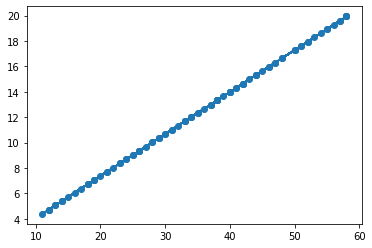

In [20]:
x = np.random.randint(10, 60, num_points) #random points between 10 and 60
w = np.array([w0, w1])
y = w1 * x + w0

plt.scatter(x, y)

X = np.column_stack((np.ones(x.shape[0]), x))
plt.plot(x, X @w)

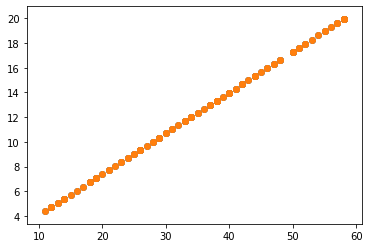

In [21]:
plt.scatter(x, y)
plt.scatter(x, X@w)